# Quality control

Here I want to check the data for any weird spikes and 
1. in th EB dataset: for the diving event 2016/2017 cut out the data from 100m and set to 250m and then replace the 100m values with nans
2. cut out weird spike in WB1 dataset 
3. WB datasets: create a 3rd dimension in both datasets
4. concat along a 3rd dimension and use mean of both datasets where 2 values exist

In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator
import xarray as xr
import cmocean as cm
import marineHeatWaves as mhw
from datetime import date

In [78]:
import warnings
warnings.filterwarnings("ignore")

In [79]:
file_name = "data/rteb1_all_merged.nc"
ds_eb = xr.open_dataset(file_name)

In [80]:
file_name = "data/rtwb1_all_merged.nc"
ds_wb1 = xr.open_dataset(file_name)

In [81]:
file_name = "data/rtwb2_all_merged.nc"
ds_wb2 = xr.open_dataset(file_name)

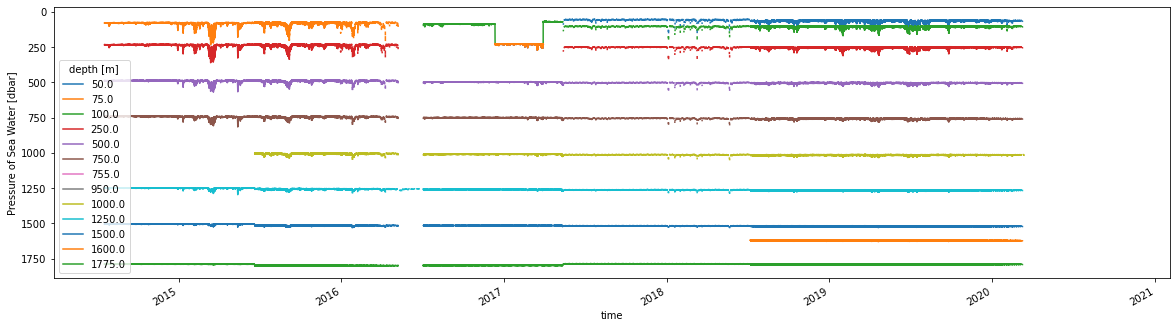

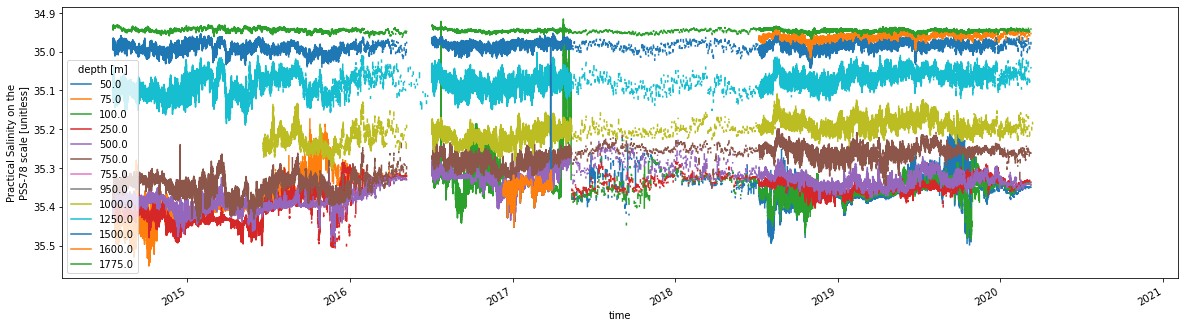

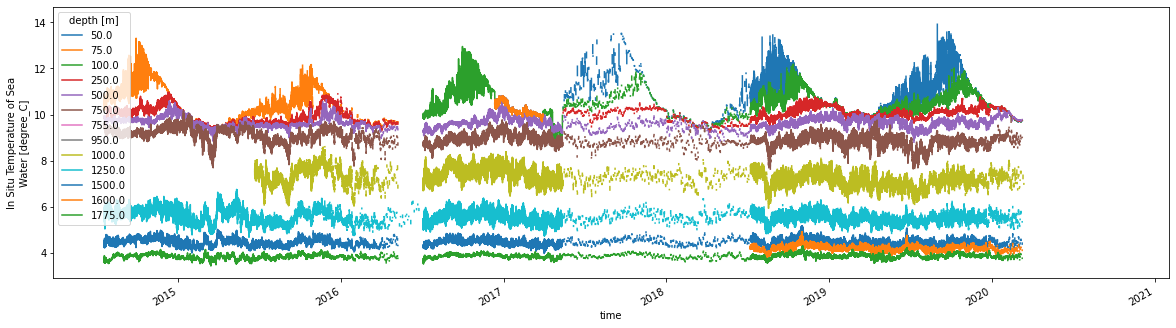

In [90]:
ds_eb.pres.where(ds_eb.pres>0).plot.line(x='time', figsize = (20,5), yincrease = False); #.where(ds.pres>0);
ds_eb.sal.where(ds_eb.pres>0).plot.line(x='time', figsize = (20,5), yincrease = False);
ds_eb.temp.plot.line(x='time', figsize = (20,5));

# seems fine, just need to fix 2017

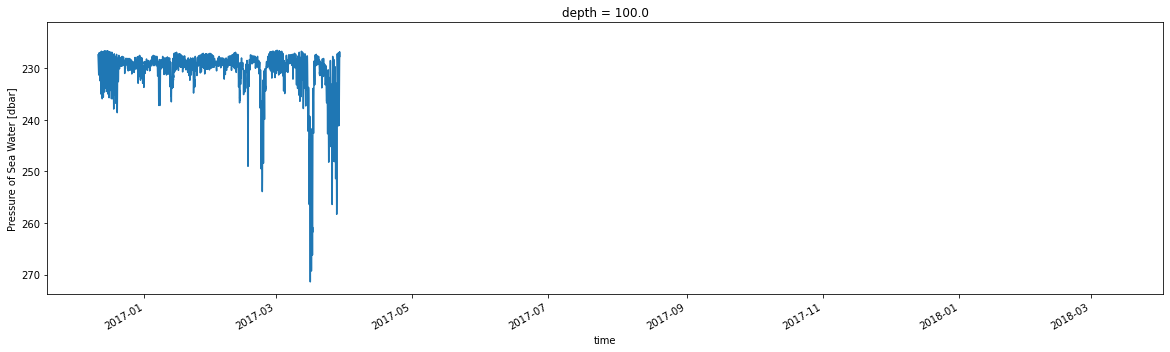

In [83]:
ds_eb.pres.sel(depth=100).where(ds_eb.pres.sel(depth=100)>220).plot.line(x='time', figsize = (20,5), yincrease = False);

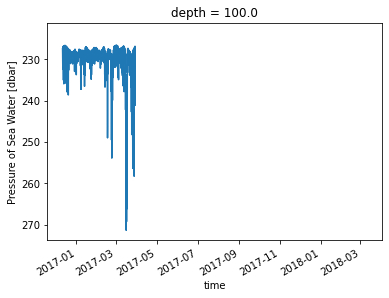

In [108]:
wrong = ds_eb.sel(depth=100,).where(ds_eb.pres.sel(depth=100)>220)

wrong.pres.plot.line(x='time', yincrease = False)

In [109]:
wrong.update({'depth':('depth', [250])})

<xarray.Dataset>
Dimensions:  (depth: 1, time: 218388)
Coordinates:
  * depth    (depth) int64 250
  * time     (time) datetime64[ns] 2014-07-18T12:30:01.008000 ... 2020-10-12T...
Data variables:
    temp     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    pres     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    sal      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    Mooring:          rteb1
    WaterDepth:       1800
    Start_Date:       2014/07/18
    Start_Time:       12:30
    End_Date:         2015/06/20
    End_Time:         06:30
    Latitude:         57.099333333333334
    Longitude:        -9.548
    Latitude_units:   degrees_north
    Longitude_units:  degrees_east

In [110]:
#ds_eb.sel(depth=250).merge(wrong, compat='override')

In [111]:
ds_eb=ds_eb.fillna(value=wrong)

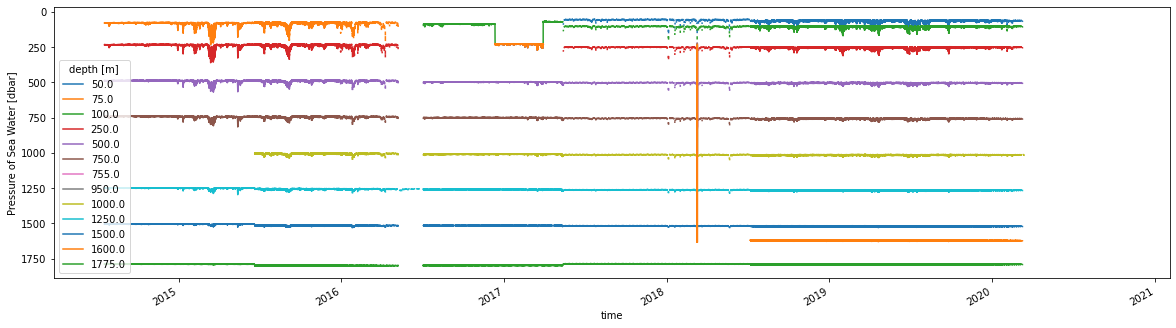

In [112]:
ds_eb.pres.plot.line(x='time', figsize = (20,5), yincrease = False);

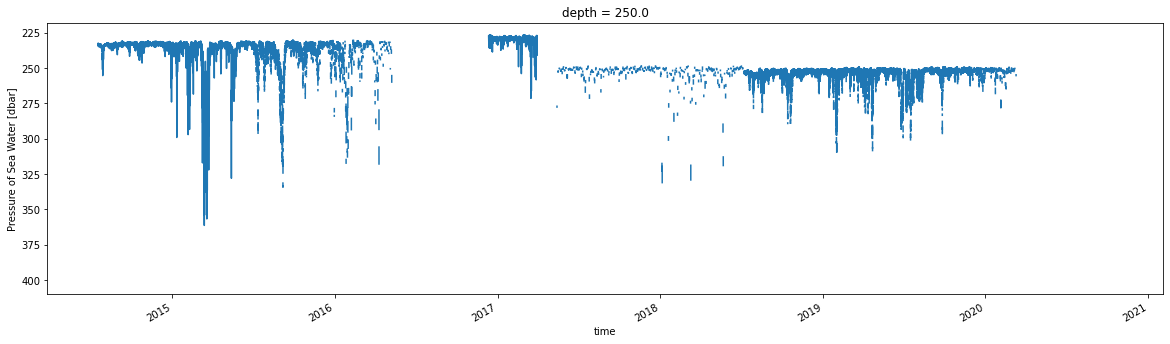

In [89]:
ds_eb.pres.sel(depth=250).plot.line(x='time', figsize = (20,5), yincrease = False);
# this looks good

In [91]:
ds_eb

<xarray.Dataset>
Dimensions:  (depth: 13, time: 218388)
Coordinates:
  * depth    (depth) float64 50.0 75.0 100.0 250.0 ... 1.5e+03 1.6e+03 1.775e+03
  * time     (time) datetime64[ns] 2014-07-18T12:30:01.008000 ... 2020-10-12T...
Data variables:
    temp     (depth, time) float64 nan nan nan nan nan ... nan 3.839 nan nan
    pres     (depth, time) float64 nan nan nan nan nan ... nan 1.79e+03 nan nan
    sal      (depth, time) float64 nan nan nan nan nan ... nan 34.94 nan nan
Attributes:
    Mooring:          rteb1
    WaterDepth:       1800
    Start_Date:       2014/07/18
    Start_Time:       12:30
    End_Date:         2015/06/20
    End_Time:         06:30
    Latitude:         57.099333333333334
    Longitude:        -9.548
    Latitude_units:   degrees_north
    Longitude_units:  degrees_east

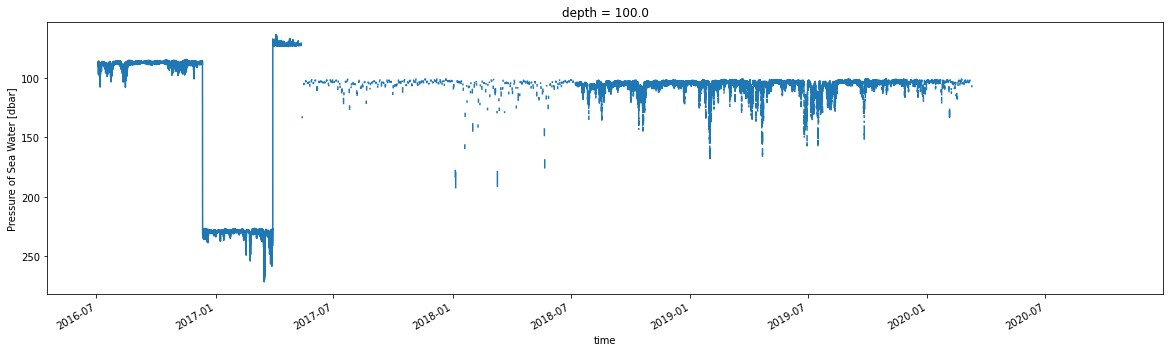

In [58]:
ds_eb.pres.sel(depth=100).plot.line(x='time', figsize = (20,5), yincrease = False);
# still need to set those values nan

In [59]:
#ds_eb=ds_eb.fillna(value=wrong)

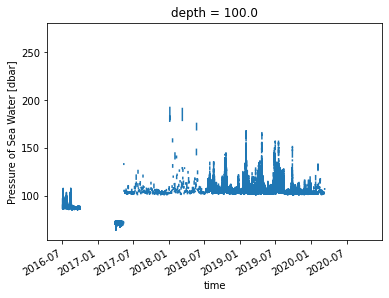

In [114]:
#ds_eb100 = xr.concat([ds_eb.sel(depth=100, time = slice('2014-7-18', '2016-10-1')),
#                  ds_eb.sel(depth=100, time = slice('2017-3-30', '2020-10-12'))],dim='time',  fill_value = np.isnan)

ds_eb100 = ds_eb.pres.sel(depth=100).where(((ds_eb.time<np.datetime64('2016-10-01')) | (ds_eb.time>np.datetime64('2017-03-30')))).plot.line()

In [96]:
np.datetime64?

Init signature: np.datetime64(self, /, *args, **kwargs)
Docstring:     
A datetime stored as a 64-bit integer, counting from ``1970-01-01T00:00:00``.

>>> np.datetime64(10, 'Y')
numpy.datetime64('1980')
>>> np.datetime64(10, 'D')
numpy.datetime64('1970-01-11')

See :ref:`arrays.datetime` for more information.

:Character code: ``'M'``
File:           ~/opt/anaconda3/envs/py3_MHW/lib/python3.9/site-packages/numpy/__init__.py
Type:           type
Subclasses:     


In [61]:
#ds_eb100 = xr.concat([ds_eb.sel(depth=100, time = slice('2016-10-1','2017-5-31')).where(ds_eb.pres.sel(depth=100)>220)],dim='time')

In [116]:
ds_eb100.pres.plot(x='time', figsize = (20,5), yincrease = False, ylim = (200,0));

AttributeError: 'list' object has no attribute 'pres'

In [63]:
ds_eb100

<xarray.Dataset>
Dimensions:  (time: 209796)
Coordinates:
  * time     (time) datetime64[ns] 2014-07-18T12:30:01.008000 ... 2020-10-12T...
    depth    float64 100.0
Data variables:
    temp     (time) float64 nan nan nan nan nan nan ... 10.65 nan 10.58 nan nan
    pres     (time) float64 nan nan nan nan nan nan ... 101.9 nan 102.1 nan nan
    sal      (time) float64 nan nan nan nan nan nan ... 35.37 nan 35.38 nan nan
Attributes:
    Mooring:          rteb1
    WaterDepth:       1800
    Start_Date:       2014/07/18
    Start_Time:       12:30
    End_Date:         2015/06/20
    End_Time:         06:30
    Latitude:         57.099333333333334
    Longitude:        -9.548
    Latitude_units:   degrees_north
    Longitude_units:  degrees_east

In [70]:
ds_eb=ds_eb.fillna(value=ds_eb100)

In [65]:
#ds_eb.sel(depth=100)

<xarray.Dataset>
Dimensions:  (time: 218388)
Coordinates:
  * time     (time) datetime64[ns] 2014-07-18T12:30:01.008000 ... 2020-10-12T...
    depth    float64 100.0
Data variables:
    temp     (time) float64 nan nan nan nan nan nan ... 10.65 nan 10.58 nan nan
    pres     (time) float64 nan nan nan nan nan nan ... 101.9 nan 102.1 nan nan
    sal      (time) float64 nan nan nan nan nan nan ... 35.37 nan 35.38 nan nan
Attributes:
    Mooring:          rteb1
    WaterDepth:       1800
    Start_Date:       2014/07/18
    Start_Time:       12:30
    End_Date:         2015/06/20
    End_Time:         06:30
    Latitude:         57.099333333333334
    Longitude:        -9.548
    Latitude_units:   degrees_north
    Longitude_units:  degrees_east

In [67]:
#ds_eb.sel(depth=100).merge(ds_eb100, overwrite_vars=frozenset({}) )
#xr.concat([ds_eb, ds_eb100], dim='time')
ds_ebt = xr.merge([ds_eb, ds_eb100], compat='override')
#ds_eb100.update({'pres' : 'pres'})

In [115]:
ds_eb100.pres.plot.line(x='time', figsize = (20,5), yincrease = False);

AttributeError: 'list' object has no attribute 'pres'

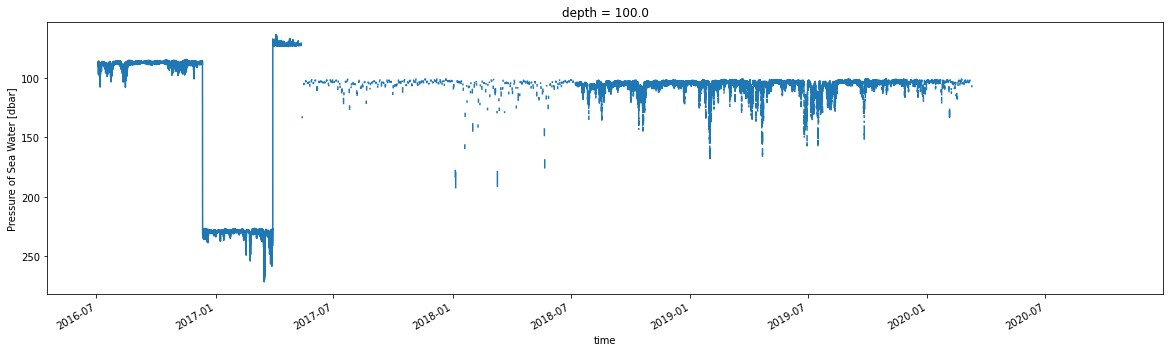

In [72]:
ds_ebt.pres.sel(depth=100).plot.line(x='time', figsize = (20,5), yincrease = False);

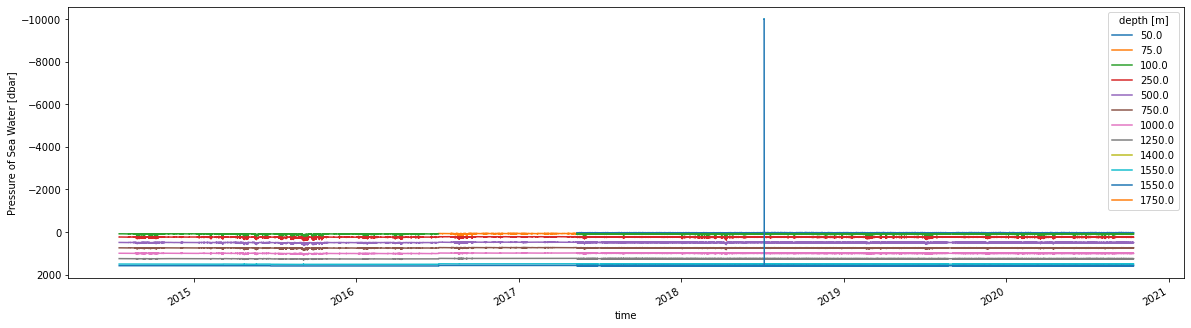

In [117]:
ds_wb1.pres.plot.line(x='time', figsize = (20,5), yincrease = False); #.where(ds.pres>0);
# need to remove the spike

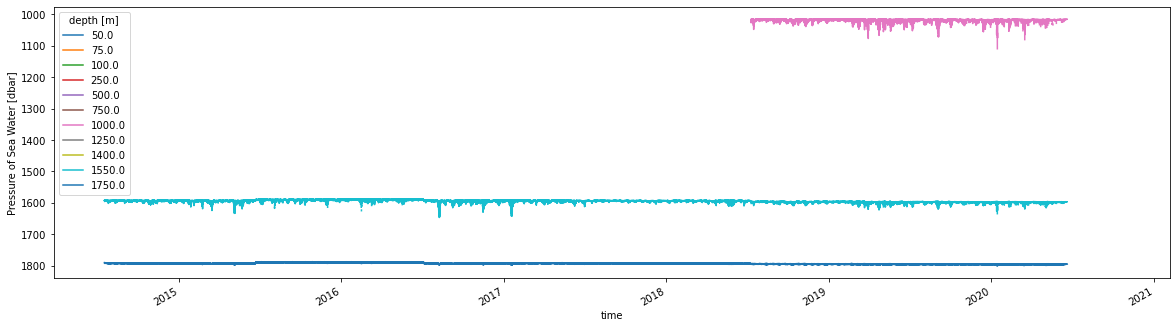

In [118]:
ds_wb2.pres.plot.line(x='time', figsize = (20,5), yincrease = False); #.where(ds.pres>0);
# this looks good